# Tesla Stock Price Prediction (Example)

The necessary libraries for the algorithm development are imported in this code block.

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import prophet
import datetime

The Tesla Stock Price file csv is imported in this section

In [56]:
data = pd.read_csv("TSLA 15_10_2022.csv")
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-10-15,274.579987,281.070007,274.116669,281.010010,281.010010,56773800
1,2021-10-18,283.929993,291.753326,283.823334,290.036682,290.036682,72621600
2,2021-10-19,292.510010,292.649994,287.503326,288.089996,288.089996,52143300
3,2021-10-20,288.450012,289.829987,285.793335,288.600006,288.600006,42096300
4,2021-10-21,285.333344,300.000000,285.166656,298.000000,298.000000,94444500
...,...,...,...,...,...,...,...
247,2022-10-10,223.929993,226.990005,218.360001,222.960007,222.960007,67925000
248,2022-10-11,220.949997,225.750000,215.000000,216.500000,216.500000,77013200
249,2022-10-12,215.330002,219.300003,211.509995,217.240005,217.240005,66860700
250,2022-10-13,208.300003,222.990005,206.220001,221.720001,221.720001,91483000


In this section, the linear graph between date and close columns is displayed.

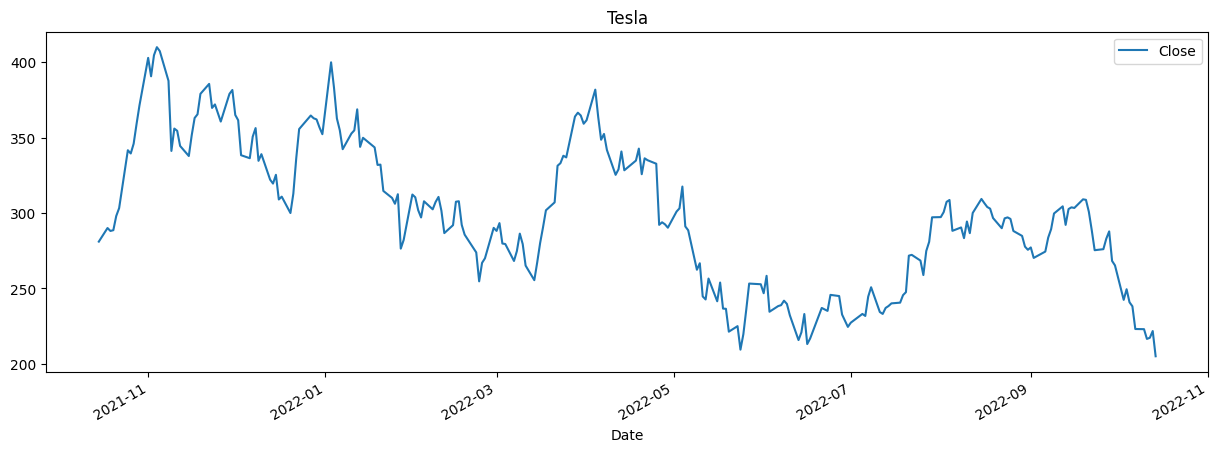

In [57]:
def xDate_vs_yValue_graph(df_input, x, y):
   df = df_input.copy()
   df.set_index(x, inplace = True)
   df[y].plot(figsize=(15, 5) , legend = True, title='Tesla')
   plt.show()
xDate_vs_yValue_graph(data, 'Date', 'Close')

After that, only the independent (Date) and dependent (in this case Close) variable columns are extracted. As we are using the Facebook prophet model here for predicting the stock prices of Tesla, so we need to rename it's.

In [58]:
entry_data = data[["Date", "Close"]]
entry_data = entry_data.rename(columns={"Date" : "ds", "Close" : "y" })
entry_data

,ds,y
0,2021-10-15,281.010010
1,2021-10-18,290.036682
2,2021-10-19,288.089996
3,2021-10-20,288.600006
4,2021-10-21,298.000000
...,...,...
247,2022-10-10,222.960007
248,2022-10-11,216.500000
249,2022-10-12,217.240005
250,2022-10-13,221.720001


In that case, we prepare the dataset to build a predictive model using Prophet, a Facebook's algorithm.

In [59]:
model = prophet.Prophet()
model.fit(entry_data)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]]

23:15:16 - cmdstanpy - INFO - Chain [1] start processing
23:15:16 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2021-10-15,359.192515,319.933371,399.523094
1,2021-10-18,365.700047,323.552763,411.096501
2,2021-10-19,362.165721,321.732080,405.478963
3,2021-10-20,363.466030,317.687300,409.151098
4,2021-10-21,360.735265,317.565708,401.090292
...,...,...,...,...
612,2023-10-10,277.234936,223.061531,330.574737
613,2023-10-11,278.964371,223.158059,333.042276
614,2023-10-12,276.662732,220.382810,329.360141
615,2023-10-13,272.713417,219.086897,321.817943


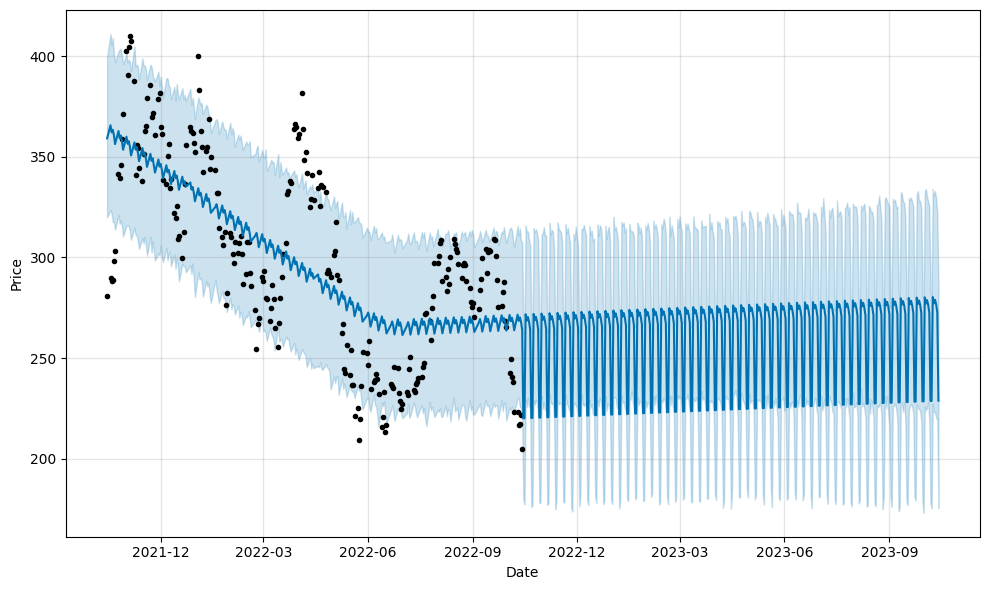

In [60]:
graph = model.plot(forcast, xlabel="Date", ylabel="Price")

In conclusion on the case of this project, it seems that Tesla stock prices will have instability in the coming year, as the values will represent ups and downs.